In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from utils import *

In [2]:
train_x = pd.read_csv(Path(processed_path, "dataset_for_2022.csv"))
train_y = train_x[["price"]]
train_x = train_x[list(train_x.columns)[:-1]]
train_x, test_x, train_y, test_y = train_test_split(train_x.values, train_y.values, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)


(8527, 50) (2843, 50) (8527, 1) (2843, 1)


In [3]:
estimator = load_object("lgb")

In [4]:
y_hat = estimator.predict(test_x)

In [5]:
print("rmse", np.sqrt(mean_squared_error(y_hat, np.array(test_y).ravel())))
print("mse", mean_squared_error(y_hat, np.array(test_y).ravel()))
print("mape", mean_absolute_percentage_error(y_hat, np.array(test_y).ravel()))
print("mae", mean_absolute_error(y_hat, np.array(test_y).ravel()))

rmse 184176.90848846527
mse 33921133620.368515
mape 1.2286238523869
mae 35788.13011443943


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
sorted_idxs = np.argsort(y_hat)
sorted_idxs[:5]

array([ 695, 2748,   83,  559, 1054])

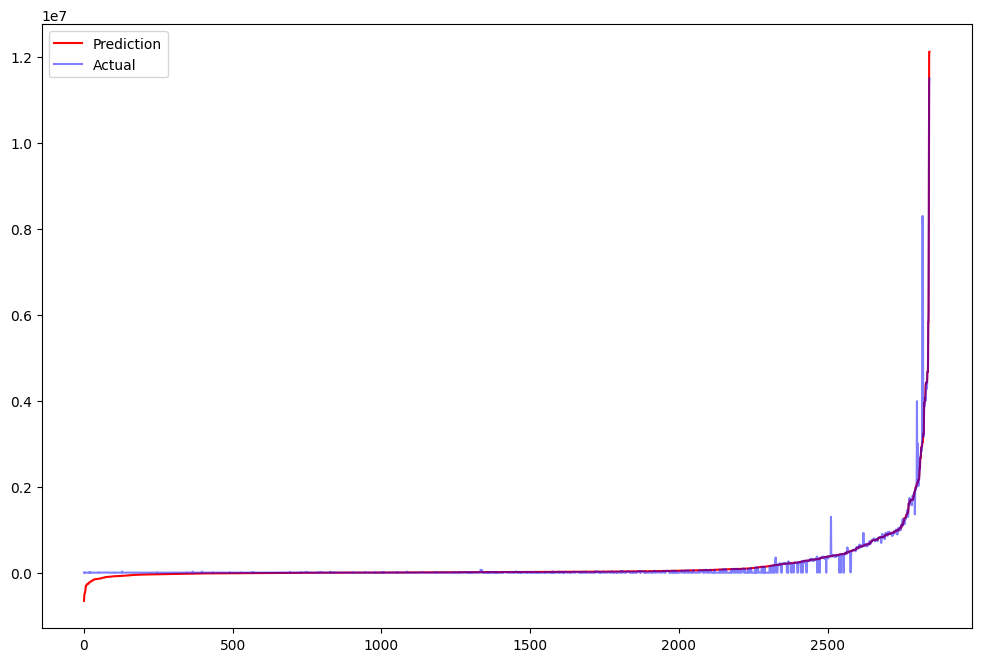

In [17]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(range(len(y_hat)), y_hat[sorted_idxs], alpha=0.99, color="red", label="Prediction")
plt.plot(range(len(y_hat)), test_y.ravel()[sorted_idxs], alpha=0.5, color='blue', label="Actual")
plt.legend()